In [31]:
import pandas as pd

df = pd.read_csv("cleaned_data_3.csv")  

# Count the number of solutes for each solvent
solute_counts = df.groupby("solvent_name")["solute_name"].count()

solute_counts = solute_counts.reset_index(name="num_solutes")

print(solute_counts)

                       solvent_name  num_solutes
0    1,1,2-trichlorotrifluoroethane            1
1                 1,2-dibromoethane            5
2                1,2-dichloroethane           22
3                1,2-diethoxyethane            1
4                   1,2-propanediol           12
..                              ...          ...
170               trichloroethylene            4
171              triethylene glycol            1
172                trifluoroethanol           17
173                        undecane           10
174                           water         3024

[175 rows x 2 columns]


In [32]:
# Find solutes in water that don't appear in other solvents
solutes_unique_to_water = df[(df["solvent_name"] == "water") & (~df["solute_name"].isin(df[df["solvent_name"] != "water"]["solute_name"]))]

# Remove solutes that are unique to water
filtered_df = df[~df["solute_name"].isin(solutes_unique_to_water["solute_name"])]

# Count the number of solutes per solvent
solute_counts = filtered_df.groupby("solvent_name")["solute_name"].count()

# Filter out solvents with less than 5 solutes
solvents_to_keep = solute_counts[solute_counts > 5].index

# Keep only the rows with solvents that have more than five solute
filtered_df = filtered_df[filtered_df["solvent_name"].isin(solvents_to_keep)]

# Filter out solutes that appear in fewer than 4 different solvents
solute_counts_across_solvents = filtered_df.groupby("solute_name")["solvent_name"].nunique()
solutes_to_keep = solute_counts_across_solvents[solute_counts_across_solvents >= 4].index
filtered_df = filtered_df[filtered_df["solute_name"].isin(solutes_to_keep)]

# Check the result
print(filtered_df["solvent_name"].value_counts())

# Save the filtered dataset to a CSV file
filtered_df.to_csv("filtered_solvent_data.csv", index=False)


solvent_name
ethanol              205
methanol             198
water                172
2-propanol           127
1-propanol           118
                    ... 
N-methylformamide      7
m-xylene               7
aniline                7
benzyl alcohol         6
dichloroethane         6
Name: count, Length: 92, dtype: int64


In [33]:
# Count unique entries
df = pd.read_csv("filtered_solvent_data.csv")
unique_solutes = df['solute_inchikey'].nunique()
unique_solvents = df['solvent_name'].nunique()

print(f"Number of unique solutes InChIKeys: {unique_solutes}")
print(f"Number of unique solvents names: {unique_solvents}")

Number of unique solutes InChIKeys: 282
Number of unique solvents names: 92


In [25]:
# Calculate total number of possible combinations
combinations = 92*282
percentage = len(df['LogS'])*100/combinations
print ('Number of possible combinations of solute and solvent: ', combinations)
print ('Percentage of data coverage: ', percentage, '%')

Number of possible combinations of solute and solvent:  25944
Percentage of data coverage:  13.852913968547641 %


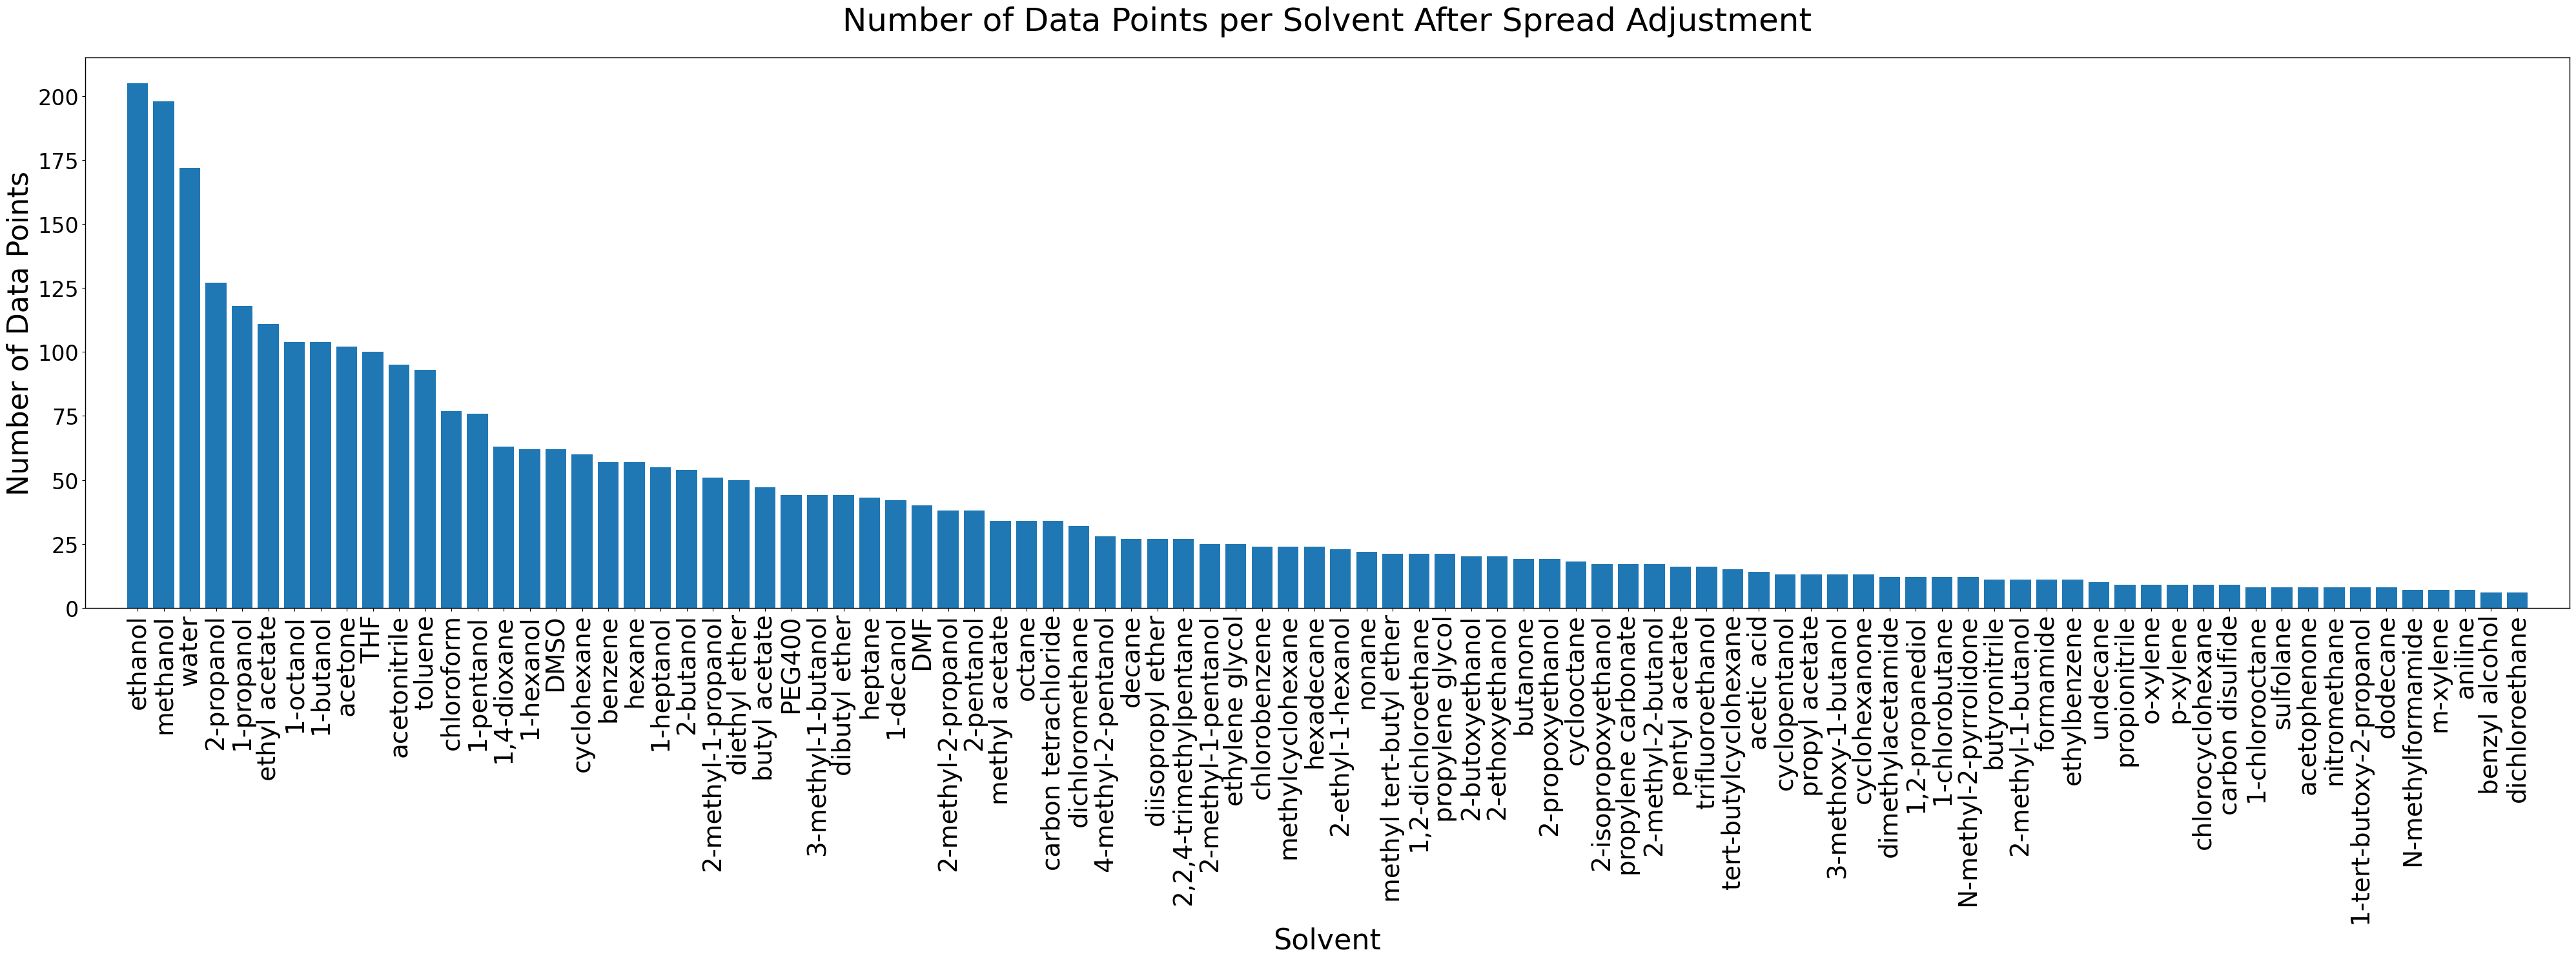

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

# Load dataset
df = pd.read_csv("filtered_solvent_data.csv")

# Count occurrences of each solvent
solvent_counts = df["solvent_name"].value_counts()

# Create numeric x positions
x_positions = list(range(len(solvent_counts)))

fig, ax = plt.subplots(figsize=(40, 15))  

bar_width = 0.8  
ax.bar(x_positions, solvent_counts.values, color="#1f77b4", width=bar_width)

# Force even spacing using FixedLocator and FixedFormatter
ax.xaxis.set_major_locator(FixedLocator(x_positions))
ax.xaxis.set_major_formatter(FixedFormatter(solvent_counts.index))

plt.xticks(rotation=90, fontsize=28) 
ax.tick_params(axis='y', labelsize=24)

ax.set_title("Number of Data Points per Solvent After Spread Adjustment", fontsize=36, pad=30)
ax.set_xlabel("Solvent", fontsize=32)
ax.set_ylabel("Number of Data Points", fontsize=32)

ax.set_xlim(-2, len(solvent_counts) + 1)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color("black")

plt.tight_layout()

plt.show()